![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 7: Erros do polinômio interpolador

## Questão 1: os métodos

Escreva uma função que retorna os coeficientes do polinômio interpolador,
dadas duas listas (ou `np.array`s) para $x_i$ e $y_i$.

Use esta função para criar uma outra, que retorna uma função
"naturalmente" vetorizada (ou seja, sem usar `np.vectorize`)
que calcula esse polinômio interpolador.

In [2]:
def lagrange_coefs(xs,ys):
    """ 
    Coeficientes (em ordem crescente) do polinômio interpolador dos pontos (x_i, y_i).
    """
    assert(len(xs) == len(ys))
    vander = np.vander(xs)
    coefs = np.linalg.solve(vander, ys)
    return coefs[::-1]
def lagrange(xs,ys):
    """ 
    Retorna uma função que calcula polinômio interpolador de Lagrange dos pontos (x_i, y_i). 
    """
    coefs = lagrange_coefs(xs,ys)
    def pol(x):
        poli = 0
        grau = 0
        for i in coefs:
            poli += i*x**grau
            grau +=1
        return poli
    return pol

In [3]:
c = lagrange_coefs([1,2,3], [4,5,7])
assert np.allclose(c, [4, -1/2, 1/2], atol=1e-14, rtol=1e-14)

In [4]:
p = lagrange([1,2,3], [4,5,7])
assert np.isclose(p(0), 4, atol=1e-14, rtol=1e-14)
assert np.isclose(p(1/2), 3.875, atol=1e-14, rtol=1e-14)

In [5]:
c = lagrange_coefs([1,-1,2,-2], [1, 2, 3, 4])
assert np.allclose(c*12, [10, -7, 8, 1])

In [6]:
p = lagrange([1,-1,2,-2], [1, 2, 3, 4])
assert np.isclose(p(5.1), 26.252583333333333, atol=1e-14, rtol=1e-14)

## Questão 2: Calculando erros

Dadas duas funções, $f$ e $g$, podemos definir o erro entre elas num intervalo $[a,b]$ como
- a integral do valor absoluto da diferença
- a raiz quadrada da integral do quadrado da diferença
- o máximo do valor absoluto da diferença

No computador, vamos aproximar estas medidas, calculando a diferença em alguma discretização do intervalo,
e depois tomando o máximo / soma dos erros.
Vamos usar o "método do ponto médio" para as integrais e, por analogia,
os mesmos pontos para o máximo.

In [7]:
def erro1(f, g, a, b, n=100):
    fx = lambda x: np.abs(f(x)-g(x))
    xs, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    mids = xs + h/2
    y = np.sum(fx(mids))*h
    return y

In [8]:
assert np.isclose(erro1(np.sin, np.cos, 0, np.pi, n=250), 2.8283899040391645)

In [9]:
assert np.isclose(erro1(np.exp, np.cos, -np.pi, np.pi), 23.565960230071205)

In [10]:
def erro2(f, g, a, b, n=100):
    fx = lambda x: np.power(f(x)-g(x), 2)
    xs, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    mids = xs + h/2
    y = np.sqrt(np.sum(fx(mids))*h)
    return y

In [11]:
assert np.isclose(erro2(np.sin, np.cos, 0, np.pi), np.sqrt(np.pi))
assert np.isclose(erro2(np.exp, np.cos, -np.pi, np.pi, n=200), 17.14462097595834)

In [12]:
def erromax(f, g, a, b, n=100):
    fx = lambda x: np.abs(f(x)-g(x))
    xs, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    mids = xs + h/2
    y = np.max(fx(mids))
    return y

In [13]:
assert np.isclose(erromax(np.sin, np.cos, 0, np.pi/2), 0.9921152567560784)
assert np.isclose(erromax(np.exp, np.cos, -np.pi, np.pi, n=200), 23.779916094373814)

## Questão 3: Gráficos

Faça o gráfico da função $\sin(x^2)$, e também do polinômio interpolador de grau 3,
no intervalo $[0, \sqrt{2\pi}]$.

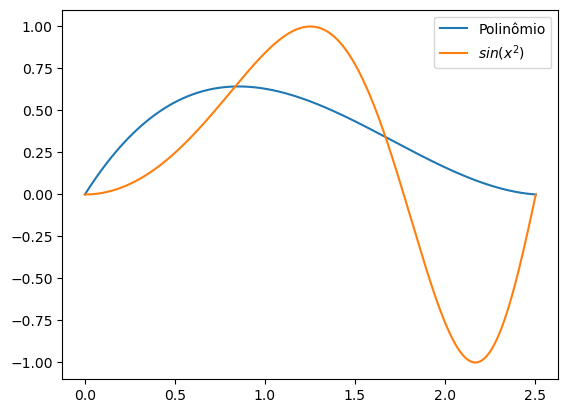

In [14]:
f = lambda x: np.sin(x**2)
xs = np.linspace(0, np.sqrt(2*np.pi), num=4)
pol = lagrange(xs, f(xs))
ts = np.linspace(0, np.sqrt(2*np.pi), num=1000)
plt.plot(ts, pol(ts), label="Polinômio")
plt.plot(ts, f(ts), label="$sin(x^2)$")
plt.legend();


Agora, faça o gráfico da diferença (sem valor absoluto) entre a função e o polinômio interpolador

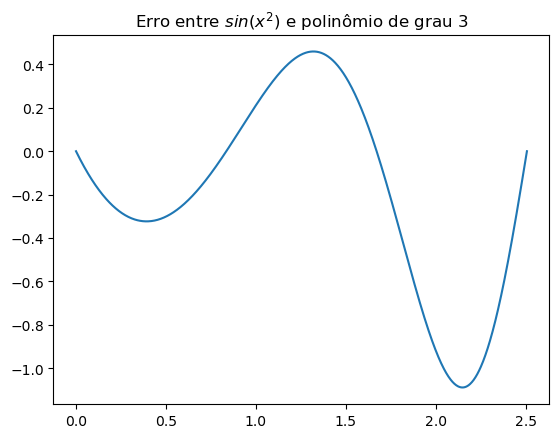

In [15]:
plt.plot(ts, f(ts)-pol(ts))
plt.title("Erro entre $sin(x^2)$ e polinômio de grau 3")
ax = plt.gca()

In [16]:
assert len(ax.lines) == 1
assert ax.get_title != ""

ys = ax.lines[0].get_ydata()
assert min(ys) < -1
assert max(ys) > 0.4

Repita para o polinômio de grau 7 (que tem o dobro de coeficientes).

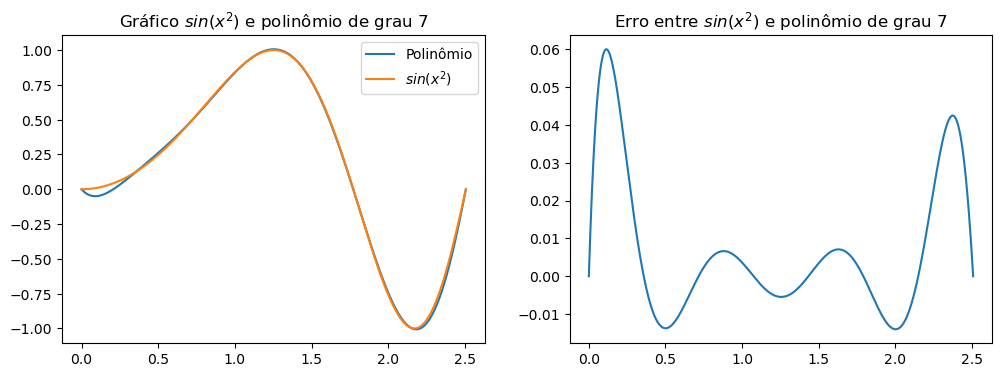

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
ax1, ax2 = axs

xs = np.linspace(0, np.sqrt(2*np.pi), num=8)
pol = lagrange(xs, f(xs))

ax1.plot(ts, pol(ts), label="Polinômio")
ax1.plot(ts, f(ts), label="$sin(x^2)$")
ax1.set_title("Gráfico $sin(x^2)$ e polinômio de grau 7")
ax1.legend()
ax2.plot(ts, f(ts)-pol(ts))
ax2.set_title("Erro entre $sin(x^2)$ e polinômio de grau 7");

In [18]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.title.get_text() != ""

In [19]:
assert len(ax2.lines) == 1
assert ax2.title.get_text() != ""

ys = ax2.lines[0].get_ydata()
assert np.isclose(max(ys), 0.06, atol=1e-4)
assert np.isclose(min(ys), -0.0140140, atol=1e-4)

O erro máximo é fácil de ver pelo gráfico.
Use as funções `erro1` e `erro2` para comparar, também, os erros "ao longo do intervalo inteiro".

In [20]:
er1 = erro1(f, pol, 0, np.sqrt(2*np.pi)) 
er2 = erro2(f, pol, 0, np.sqrt(2*np.pi))
print(f"Erro 1 : {er1}, Erro 2 :{er2}")

Erro 1 : 0.03284907265847129, Erro 2 :0.03143672821193164


## Questão 4: Erros e subdivisões

Para o grau $d$ do polinômio interpolador variando entre $3$ e $30$,
faça o gráfico do máximo do erro entre o polinômio interpolador e a função $\sin(x^2)$,
no mesmo intervalo $[0, \sqrt{2\pi}]$.

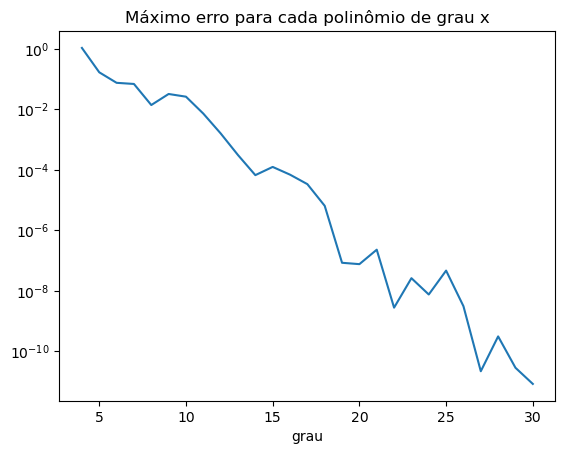

In [21]:
ds = np.arange(3,30)
polis = []
for d in ds:
    xs = np.linspace(0, np.sqrt(np.pi*2), num=d+1)
    poli = lagrange(xs, f(xs))
    polis.append(poli)

ys = [max(poli(ts)-f(ts)) for poli in polis]
plt.semilogy(ds+1, ys)
plt.title("Máximo erro para cada polinômio de grau x")
plt.xlabel("grau")
ax = plt.gca()

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como o erro decai quando aumentamos $n$?

Decai exponencialmente, mas com algumas variações.

Agora, repita para os 3 erros.

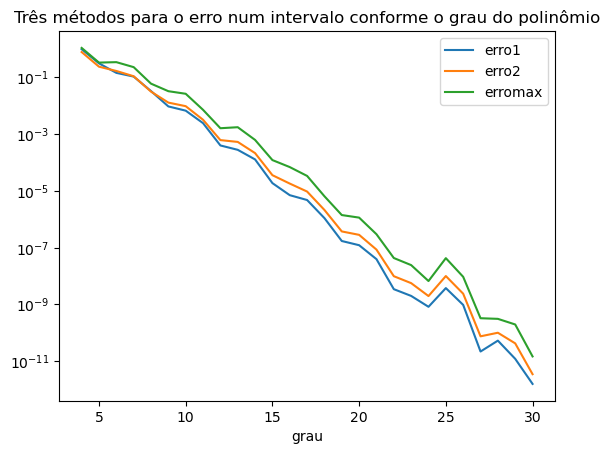

In [23]:
ds = np.arange(3,30)
polis = []
ys2, ys3, ys4 = [], [], []

for d in ds:
    xs = np.linspace(0, np.sqrt(np.pi*2), num=d+1)
    poli = lagrange(xs, f(xs))
    polis.append(poli)

for poli in polis:
    ys2.append(erro1(poli, f, 0, np.sqrt(2*np.pi)))
    ys3.append(erro2(poli, f, 0, np.sqrt(2*np.pi)))
    ys4.append(erromax(poli, f, 0, np.sqrt(2*np.pi)))

plt.semilogy(ds+1, ys2, label="erro1")
plt.semilogy(ds+1, ys3, label="erro2")
plt.semilogy(ds+1, ys4, label="erromax")
plt.legend()
plt.xlabel("grau")
plt.title("Três métodos para o erro num intervalo conforme o grau do polinômio")
ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_title() != ""

O que você observa?  Todos os erros decaem da mesma forma?

O perfil das curvas são praticamente iguais e todas decaem exponencialmente, mas a velocidade de decaimento são diferentes. Erro1 decai mais que as outras, seguida do erro2 e, por fim, erromax, a que decai menos com o aumento do grau.